In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

In [3]:
data = pd.read_csv("/content/drive/MyDrive/tensorflow fundemental/tesla data")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-28,21.261333,21.333332,20.720667,21.325333,21.325333,157810500
1,2019-03-01,20.462667,20.475332,19.459999,19.652666,19.652666,343671000
2,2019-03-04,19.874666,19.933332,18.851999,19.024000,19.024000,256452000
3,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
4,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
...,...,...,...,...,...,...,...
1254,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
1255,2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78841900
1256,2024-02-26,192.289993,201.779999,192.000000,199.399994,199.399994,111747100
1257,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400


In [5]:
training = data.iloc[:800,1:2].values
testing = data.iloc[800:,1:2].values

In [6]:
training

array([[ 21.261333],
       [ 20.462667],
       [ 19.874666],
       [ 18.799999],
       [ 18.431999],
       [ 18.589333],
       [ 18.460667],
       [ 18.901333],
       [ 19.099333],
       [ 18.926666],
       [ 19.496668],
       [ 18.900667],
       [ 18.4     ],
       [ 17.833332],
       [ 17.979334],
       [ 18.173332],
       [ 18.172001],
       [ 17.313999],
       [ 17.629333],
       [ 17.916668],
       [ 18.477333],
       [ 18.58    ],
       [ 18.841333],
       [ 19.219999],
       [ 19.154667],
       [ 17.459333],
       [ 17.990667],
       [ 18.512667],
       [ 18.110001],
       [ 18.449333],
       [ 17.886667],
       [ 18.014668],
       [ 17.908667],
       [ 17.716667],
       [ 18.316668],
       [ 18.082001],
       [ 17.933332],
       [ 17.343332],
       [ 17.59    ],
       [ 17.      ],
       [ 16.433332],
       [ 15.724   ],
       [ 16.137333],
       [ 15.923333],
       [ 16.368   ],
       [ 16.257334],
       [ 16.667999],
       [ 17.1

In [7]:
testing

array([[286.92334 ],
       [301.059998],
       [301.313324],
       [313.006653],
       [295.666656],
       [278.816681],
       [273.103333],
       [265.      ],
       [233.666672],
       [257.82666 ],
       [255.720001],
       [249.119995],
       [248.17334 ],
       [235.666672],
       [237.996674],
       [218.339996],
       [217.843338],
       [207.949997],
       [220.473328],
       [241.083328],
       [257.946655],
       [251.720001],
       [244.156662],
       [243.226669],
       [244.353333],
       [234.      ],
       [240.08667 ],
       [249.339996],
       [235.156662],
       [223.166672],
       [218.286667],
       [220.916672],
       [222.736664],
       [213.433334],
       [224.603333],
       [234.503326],
       [237.906662],
       [237.470001],
       [249.366669],
       [244.483337],
       [230.5     ],
       [224.509995],
       [227.      ],
       [223.      ],
       [230.779999],
       [233.919998],
       [242.333328],
       [252.1

In [8]:
#data normalization
mm_scale = MinMaxScaler(feature_range=(0,1))
training_scaled = mm_scale.fit_transform(training)

In [9]:
mm_scale

MinMaxScaler()

In [20]:
training_scaled

array([[2.30046987e-02],
       [2.10050175e-02],
       [1.95327944e-02],
       [1.68420684e-02],
       [1.59206786e-02],
       [1.63146078e-02],
       [1.59924569e-02],
       [1.70957861e-02],
       [1.75915338e-02],
       [1.71592143e-02],
       [1.85863719e-02],
       [1.70941186e-02],
       [1.58405603e-02],
       [1.44217503e-02],
       [1.47873066e-02],
       [1.52730343e-02],
       [1.52697017e-02],
       [1.31214565e-02],
       [1.39109824e-02],
       [1.46304050e-02],
       [1.60341848e-02],
       [1.62912401e-02],
       [1.69455595e-02],
       [1.78936545e-02],
       [1.77300778e-02],
       [1.34853403e-02],
       [1.48156819e-02],
       [1.61226533e-02],
       [1.51144676e-02],
       [1.59640791e-02],
       [1.45552892e-02],
       [1.48757751e-02],
       [1.46103723e-02],
       [1.41296472e-02],
       [1.56319156e-02],
       [1.50443619e-02],
       [1.46721279e-02],
       [1.31948998e-02],
       [1.38125013e-02],
       [1.23352732e-02],


In [11]:
x_train = []
y_train = []
for i in range(60,800):
  x_train.append(training_scaled[i-60:i,0])
  y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1]))

In [12]:
# Model Architecture
model= Sequential()

#building model
model.add(LSTM(units=50, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [13]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting values to model
model.fit(x_train,y_train,epochs=50, batch_size=32)

Epoch 1/50
24/24 [==============================] - 11s 99ms/step - loss: 0.0524
Epoch 2/50
24/24 [==============================] - 2s 98ms/step - loss: 0.0096
Epoch 3/50
24/24 [==============================] - 2s 99ms/step - loss: 0.0066
Epoch 4/50
24/24 [==============================] - 3s 135ms/step - loss: 0.0078
Epoch 5/50
24/24 [==============================] - 3s 125ms/step - loss: 0.0061
Epoch 6/50
24/24 [==============================] - 2s 100ms/step - loss: 0.0063
Epoch 7/50
24/24 [==============================] - 2s 99ms/step - loss: 0.0051
Epoch 8/50
24/24 [==============================] - 3s 104ms/step - loss: 0.0053
Epoch 9/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0044
Epoch 10/50
24/24 [==============================] - 3s 135ms/step - loss: 0.0062
Epoch 11/50
24/24 [==============================] - 2s 99ms/step - loss: 0.0050
Epoch 12/50
24/24 [==============================] - 2s 99ms/step - loss: 0.0048
Epoch 13/50
24/24 [===========

In [14]:
 #Preparing Test Data
 train_data = data.iloc[:800, 1:2]
 test_data = data.iloc[800:, 1:2]
 total_data = pd.concat((train_data, test_data),axis=0)
 inputs= total_data[len(total_data)-len(test_data)- 60:].values
 inputs=inputs.reshape(-1,1)
 inputs= mm_scale.transform(inputs)

In [15]:
inputs

array([[0.70588137],
       [0.71858386],
       [0.74075896],
       [0.7255193 ],
       [0.75011473],
       [0.72788959],
       [0.72894113],
       [0.68883066],
       [0.72090403],
       [0.73263001],
       [0.73197075],
       [0.70921976],
       [0.66592945],
       [0.66284145],
       [0.55431108],
       [0.64514813],
       [0.64997207],
       [0.69559921],
       [0.69764392],
       [0.70318565],
       [0.67842327],
       [0.68443231],
       [0.63371418],
       [0.67039449],
       [0.68038461],
       [0.67099545],
       [0.62126208],
       [0.61680536],
       [0.64495611],
       [0.66330884],
       [0.6996136 ],
       [0.73340625],
       [0.74594179],
       [0.78762133],
       [0.81248381],
       [0.81103998],
       [0.85869518],
       [0.89449082],
       [0.880453  ],
       [0.88329061],
       [0.8720904 ],
       [0.87895912],
       [0.91811815],
       [0.86568073],
       [0.84808752],
       [0.84042597],
       [0.78800521],
       [0.802

In [16]:
x_test = []
for i in range(60,519):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#prediction
stock_price_predicted = model.predict(x_test)
stock_price_predicted = mm_scale.inverse_transform(stock_price_predicted)

15/15 [==============================] - 2s 28ms/step


In [17]:
stock_price_predicted

array([[331.1169  ],
       [322.08774 ],
       [314.00684 ],
       [308.1394  ],
       [305.5764  ],
       [305.44583 ],
       [305.68805 ],
       [304.7417  ],
       [301.81918 ],
       [295.7679  ],
       [288.09424 ],
       [280.40155 ],
       [273.63684 ],
       [268.3106  ],
       [264.06387 ],
       [260.67514 ],
       [257.2071  ],
       [253.23004 ],
       [248.45522 ],
       [243.58139 ],
       [240.14377 ],
       [239.7608  ],
       [242.65321 ],
       [247.65236 ],
       [253.1635  ],
       [257.9085  ],
       [260.68    ],
       [261.38712 ],
       [260.8914  ],
       [259.37448 ],
       [256.5785  ],
       [252.45549 ],
       [247.52643 ],
       [242.56166 ],
       [237.85883 ],
       [234.09923 ],
       [232.09875 ],
       [232.28613 ],
       [234.46147 ],
       [238.49394 ],
       [243.59164 ],
       [248.14497 ],
       [250.78798 ],
       [251.19376 ],
       [249.57649 ],
       [246.90182 ],
       [244.21193 ],
       [242.5

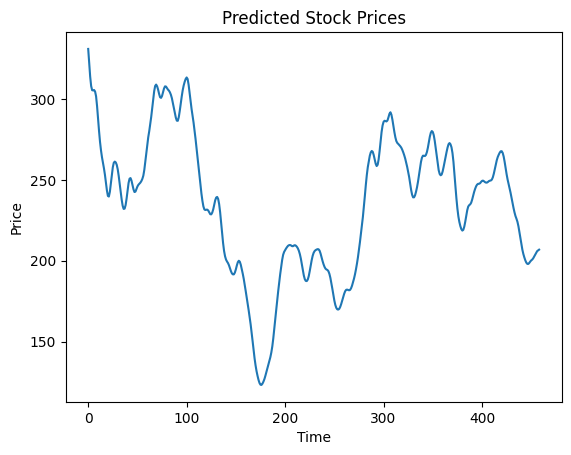

In [21]:
plt.plot(stock_price_predicted)
plt.title('Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

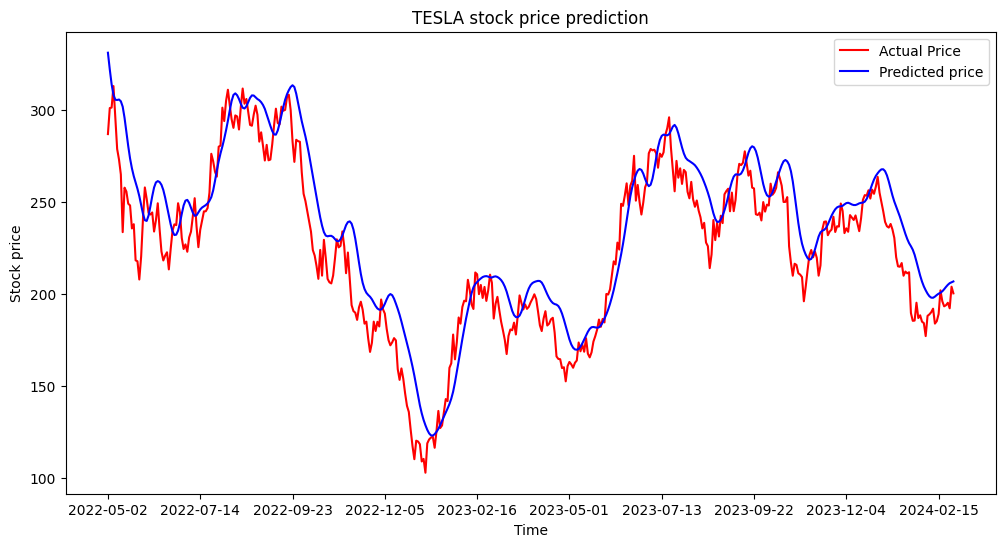

In [19]:
#visualization
plt.figure(figsize = (12,6))
plt.plot(data.loc[800:, "Date"],test_data.values,color="red",label="Actual Price")
plt.plot(data.loc[800:, "Date"],stock_price_predicted,color ="blue",label="Predicted price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()